### API 활용_스타벅스 매장관련 데이터 분석


In [98]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import time
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumGothic')

In [4]:
def get_seoul():
    
    url = 'https://www.starbucks.co.kr/store/getStore.do?r=UENRAT44P1'
    data = {
    'ins_lat':'37.2637696',
    'ins_lng':'127.0939648',
    'p_sido_cd':'01', 
    'p_gugun_cd':'',  
    'in_biz_cd':'',
    'set_date':'',
    'iend':'1000'
    }
    response = requests.post(url, data)
    temp_list = response.json()['list']
    df_temp = pd.DataFrame(temp_list)
    
    df = df_temp[['sido_name', 'gugun_name', 's_name', 'addr', 'doro_address','open_dt', 'lat', 'lot' ]]
    df = df.sort_values('open_dt', ascending = True).reset_index(drop=True)
    df.columns = ['시/도', '구/군', '매장명', '주소', '도로명 주소', '오픈일', '경도', '위도']
    
    df['위도'] = df['위도'].astype(float)
    df['경도'] = df['경도'].astype(float)
    
    file_name = 'starbucks_seoul.csv'
    df.to_csv(file_name, index=False)
    df_read = pd.read_csv(file_name)
        
    return df

In [5]:
df = get_seoul()
df

,시/도,구/군,매장명,주소,도로명 주소,오픈일,경도,위도
0,서울,서대문구,이대R,서울특별시 서대문구 대현동 54-4,서울특별시 서대문구 이화여대길 34 (대현동),19990727,37.558483,126.945964
1,서울,영등포구,여의도,서울특별시 영등포구 여의도동 23-9,서울특별시 영등포구 국제금융로2길 28 (여의도동),20001009,37.524035,126.924518
2,서울,강남구,압구정역,서울특별시 강남구 신사동 580-2 관영빌딩 1층 지하1층,"서울특별시 강남구 압구정로 170, 관영빌딩 1층 지하1층 (신사동)",20010310,37.526741,127.028110
3,서울,성동구,한양대,"서울특별시 성동구 행당동 31-11 경희빌딩 1,2층","서울특별시 성동구 왕십리로 225 (행당동) 1,2층",20010420,37.557270,127.042165
4,서울,종로구,인사,서울특별시 종로구 인사동 39,서울특별시 종로구 인사동길 14 (인사동),20010810,37.572129,126.987035
...,...,...,...,...,...,...,...,...
594,서울,강남구,언주역,서울특별시 강남구 역삼동 652-2,서울특별시 강남구 봉은사로 222 (역삼동),20221124,37.507775,127.036472
595,서울,서대문구,이대역,서울특별시 서대문구 대현동 45-8 유인빌딩,서울특별시 서대문구 신촌로 183 (대현동),20221213,37.557086,126.946280
596,서울,성동구,신금호역,서울특별시 성동구 금호동1가 122 1~5층 전체,서울특별시 성동구 금호로 158-1 (금호동1가) 1~5층 전체,20221213,37.554967,127.020145
597,서울,동대문구,경동1960,서울특별시 동대문구 제기동 1036경동시장 3~4층,서울특별시 동대문구 고산자로36길 3 (제기동),20221216,37.579614,127.038685


In [6]:
df.dtypes

시/도        object
구/군        object
매장명        object
주소         object
도로명 주소     object
오픈일        object
경도        float64
위도        float64
dtype: object

### 스타벅스 전국 매장 스크래핑

In [44]:
def get_all(sido_code):
    
    url = 'https://www.starbucks.co.kr/store/getStore.do?r=UENRAT44P1'
    data = {
    'ins_lat':'37.2637696',
    'ins_lng':'127.0939648',
    'p_sido_cd':sido_code, 
    'p_gugun_cd':'',  
    'in_biz_cd':'',
    'set_date':'',
    'iend':'1000'
    }
    response = requests.post(url, data)
    temp_list = response.json()['list']
    df_temp = pd.DataFrame(temp_list)
    
    df = df_temp[['sido_name', 'gugun_name', 's_name', 'addr', 'doro_address','open_dt', 'lat', 'lot', 'sido_code' ]]
    df = df.sort_values('open_dt', ascending = True).reset_index(drop=True)
    df.columns = ['시/도', '구/군', '매장명', '주소', '도로명 주소', '오픈일', '경도', '위도', '코드']
    
    df['위도'] = df['위도'].astype(float)
    df['경도'] = df['경도'].astype(float)
#     df['경도'] = df['오픈일'].astype(int)
    
    file_name = 'starbucks_all.csv'
    df.to_csv(file_name, index=False)
    df_read = pd.read_csv(file_name)
        
    return df

In [45]:
temp_list = [] 

for no in range(1, 18):
    
    if no <= 9:
        df_temp = get_all(f'0{no}')
    else:
        df_temp = get_all(no)
    
    temp_list.append(df_temp)
    time.sleep(0.01)
        
df = pd.concat(temp_list).reset_index(drop=True)
df

,시/도,구/군,매장명,주소,도로명 주소,오픈일,경도,위도,코드
0,서울,서대문구,이대R,서울특별시 서대문구 대현동 54-4,서울특별시 서대문구 이화여대길 34 (대현동),19990727,19990727,126.945964,01
1,서울,영등포구,여의도,서울특별시 영등포구 여의도동 23-9,서울특별시 영등포구 국제금융로2길 28 (여의도동),20001009,20001009,126.924518,01
2,서울,강남구,압구정역,서울특별시 강남구 신사동 580-2 관영빌딩 1층 지하1층,"서울특별시 강남구 압구정로 170, 관영빌딩 1층 지하1층 (신사동)",20010310,20010310,127.028110,01
3,서울,성동구,한양대,"서울특별시 성동구 행당동 31-11 경희빌딩 1,2층","서울특별시 성동구 왕십리로 225 (행당동) 1,2층",20010420,20010420,127.042165,01
4,서울,종로구,인사,서울특별시 종로구 인사동 39,서울특별시 종로구 인사동길 14 (인사동),20010810,20010810,126.987035,01
...,...,...,...,...,...,...,...,...,...
1774,세종,None,세종보람,세종특별자치시 보람동 700-81 호려울마을7단지 근린생활시설,"세종특별자치시 한누리대로 2165 (보람동) A118,119,120,121,128,...",20191212,20191212,127.286519,17
1775,세종,None,세종소담,"세종특별자치시 소담동 539 새샘마을7단지 근린생활시설 -1동 12호,13호,14호...","세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",20210115,20210115,127.300509,17
1776,세종,None,세종아름,"세종특별자치시 아름동 1329 다올비즈니스센터 103,104,105,202,203호","세종특별자치시 아름서1길 13-9 (아름동) 103,104,105,202,203호",20210226,20210226,127.242770,17
1777,세종,None,세종충남대학교병원,세종특별자치시 도담동 407 세종충남대학교병원 헬스케어센터 1층,세종특별자치시 보듬7로 20 (도담동) 헬스케어센터 1층,20210609,20210609,127.258280,17


In [46]:
df.dtypes

시/도        object
구/군        object
매장명        object
주소         object
도로명 주소     object
오픈일        object
경도          int32
위도        float64
코드         object
dtype: object

In [28]:
df_code = pd.DataFrame(index=df['시/도'].unique())
df_code = df_code.drop('강원도')
df_code['코드'] = df['코드'].unique()
df_code

,코드
서울,01
광주,02
대구,03
대전,04
부산,05
울산,06
인천,07
경기,08
강원,09
경남,10


In [47]:
df = df.sort_values(by = '오픈일', ascending=True).reset_index(drop=True)
df

,시/도,구/군,매장명,주소,도로명 주소,오픈일,경도,위도,코드
0,서울,서대문구,이대R,서울특별시 서대문구 대현동 54-4,서울특별시 서대문구 이화여대길 34 (대현동),19990727,19990727,126.945964,01
1,서울,영등포구,여의도,서울특별시 영등포구 여의도동 23-9,서울특별시 영등포구 국제금융로2길 28 (여의도동),20001009,20001009,126.924518,01
2,서울,강남구,압구정역,서울특별시 강남구 신사동 580-2 관영빌딩 1층 지하1층,"서울특별시 강남구 압구정로 170, 관영빌딩 1층 지하1층 (신사동)",20010310,20010310,127.028110,01
3,서울,성동구,한양대,"서울특별시 성동구 행당동 31-11 경희빌딩 1,2층","서울특별시 성동구 왕십리로 225 (행당동) 1,2층",20010420,20010420,127.042165,01
4,경기,고양시 덕양구,화정,경기도 고양시 덕양구 화정동 970-5,경기도 고양시 덕양구 화신로272번길 57 (화정동),20010508,20010508,126.831454,08
...,...,...,...,...,...,...,...,...,...
1774,전남,광양시,광양마동DT,전라남도 광양시 마동 421-2,전라남도 광양시 백운로 1267 (마동),20230118,20230118,127.705859,12
1775,서울,구로구,고척아이파크,"서울특별시 구로구 고척동 100-7 고척아이파크, 1층 D-101호","서울특별시 구로구 경인로43길 49 (고척동, 고척아이파크), 1층 D-101호",20230119,20230119,126.858221,01
1776,울산,울주군,울산 KTX,울산광역시 울주군 삼남읍 신화리 1606-11,울산광역시 울주군 삼남읍 도호1길 16,20230119,20230119,129.141895,06
1777,경기,부천시,소사역,경기도 부천시 소사본동 70-16 부천 한신더휴 메트로,"경기도 부천시 경인옛로 25 (소사본동, 부천 한신더휴 메트로)",20230120,20230120,126.794930,08


In [86]:
def get_open_store():
  
    temp_list = []
    year_list = []
    year = 1999
    
    while True:
        if year >= 2023:
            break
        else:
            df_temp = df[(df['오픈일'] >= f'{year}0000') & (df['오픈일'] < f'{year+1}0000')]
            temp_list.append(df_temp.shape[0])
            year_list.append(year)
            year += 1
    df_temp = pd.DataFrame({'오픈매장수' : temp_list}, index = year_list )
    
    return df_temp

In [102]:
y_value = get_open_store()['오픈매장수']
x_value = get_open_store().T.columns

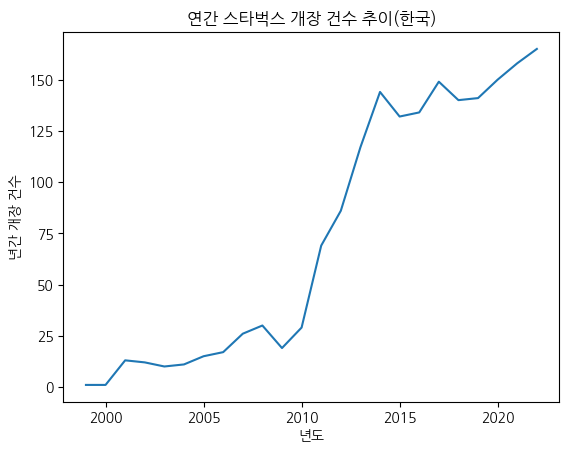

In [103]:
 
plt.xlabel('년도')
plt.ylabel('년간 개장 건수')
plt.title('연간 스타벅스 개장 건수 추이(한국)')

plt.plot(y_value)
plt.show()